# Stereo-seq

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
import BINARY

In [4]:
import pysodb
sodb = pysodb.SODB()

In [5]:
# Define names of the dataset_name and experiment_name
dataset_name = 'Fu2021Unsupervised'
experiment_name = 'StereoSeq_MOB'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
adata_raw = sodb.load_experiment(dataset_name,experiment_name)

load experiment[StereoSeq_MOB] in dataset[Fu2021Unsupervised]


In [6]:
adata_raw

AnnData object with n_obs × n_vars = 19109 × 27106
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [7]:
adata = BINARY.clean_adata(adata_raw)
adata

AnnData object with n_obs × n_vars = 19109 × 27106
    obsm: 'spatial'

In [8]:
adata.var_names_make_unique()

In [9]:
adata = BINARY.Count2Binary(adata)

In [10]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000) 

In [11]:
BINARY.Construct_Spatial_Graph(adata, use_method='KNN', cutoff=12)

------Constructing spatial graph...------
The graph contains 229308 edges, 19109 cells.
12.0000 neighbors per cell on average.


In [12]:
adata = BINARY.train_BINARY(adata, pos_weight = 10, device= 'cuda:0')

Size of Input:  (19109, 3000)


100%|██████████| 1000/1000 [00:42<00:00, 23.51it/s]


In [13]:
sc.pp.neighbors(adata, use_rep='BINARY')
sc.tl.umap(adata)

In [14]:
adata = BINARY.mclust_R(adata, used_obsm='BINARY', num_cluster=7)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


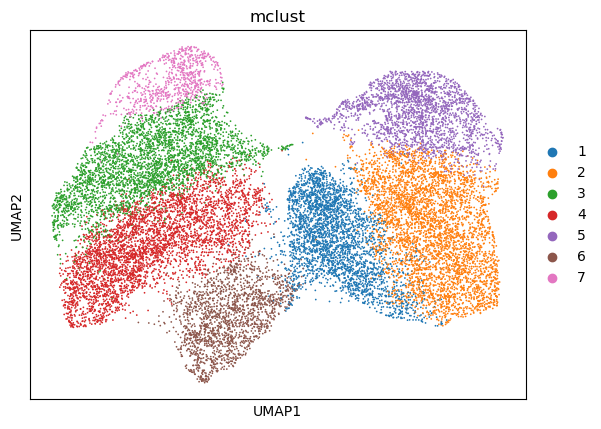

In [15]:
sc.pl.umap(adata, color=["mclust"])

(6005.190789473684, 12428.6600877193, 9986.774763741741, 15062.302776957435)

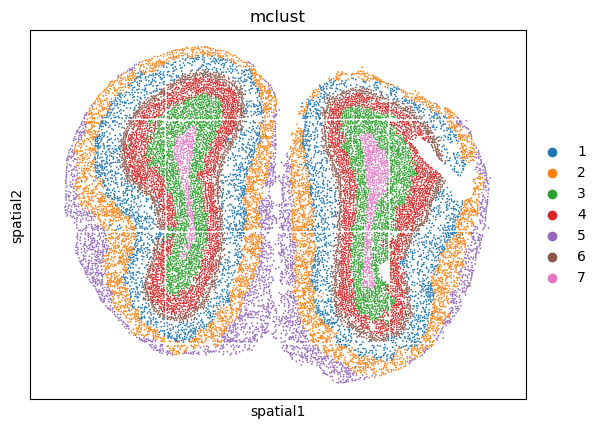

In [16]:
ax = sc.pl.embedding(adata, basis='spatial', color=["mclust"], show= False)
ax.axis('equal')